# Big Mart Sales Prediction Analysis

Contents:
#Problem Statement 
1. Data
2. Data Understanding 
3. Data Preprocessing 
  * Correct the categorical data
  * Treatment for missing values 
  * Treatment for outliers in the data
  * Binning for some continous variables.
4. Descriptive Statistics
4. Exploratory Data Analysis
5. Data Preparation for model building 
  * data encoding (requirement of model building)
6. Model Buliding and Model Evaluation.
-----------------------------------------------------------------------------------------------------------------------

Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Objective: To predict sales at a item store level.

In [1]:
#Load some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data

In [2]:
#Load Data
data=pd.read_csv("bigmart_train.csv")

In [3]:
#See 1st 5 instances in data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 2. Data Understanding  

In [4]:
#Check shape of the data
data.shape

(8523, 12)

In [5]:
#Check variables 
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


* From above information, Item_Weight,Outlet_Size are the columns which contains null values
* Also, data type of each variable is given in above table

In [7]:
#data.dtypes
pd.DataFrame(data.dtypes,columns=["Data type"])

,Data type
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [8]:
###############################################################################################################

In [9]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [10]:
###############################################################################################################

In [11]:
#'Item_Identifier'
#unique
print("length of unique values :",len(data['Item_Identifier'].unique()))
print("unique values :",data['Item_Identifier'].unique())

length of unique values : 1559
unique values : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


length of unique values : 5
unique values : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
value counts:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


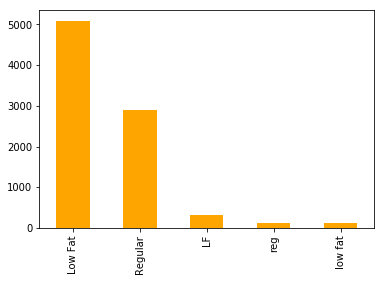

In [12]:
#'Item_Fat_Content'
#unique
print("length of unique values :",len(data['Item_Fat_Content'].unique()))
print("unique values :",data['Item_Fat_Content'].unique())
#value counts
print("value counts:")
print(data['Item_Fat_Content'].value_counts())   #Printing the frequency of each categary in column Item_Fat_Content:
data['Item_Fat_Content'].value_counts().plot(kind='bar',color='orange')

Some Categories in variable "Item_Fat_Content" are same but category names are different.So we have to make it same according to category

length of unique values >>>: 16
unique values >>>: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
value counts >>>:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


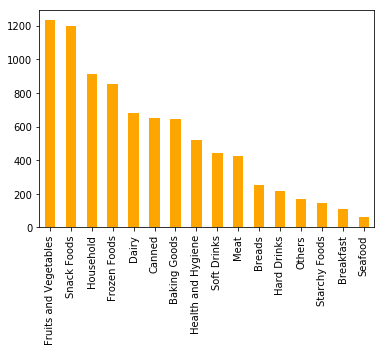

In [13]:
#'Item_Type'
#unique
print("length of unique values >>>:",len(data['Item_Type'].unique()))
print("unique values >>>:",data['Item_Type'].unique())
#value_counts
print("value counts >>>:")
print(data['Item_Type'].value_counts())
data['Item_Type'].value_counts().plot(kind='bar',color='orange')

#Most of the item sold belongs to category "Fruits and Vegetables" and "Snack Foods".
#Seafood have low demand

In [14]:
#'Outlet_Identifier'
#unique
print("length of unique values >>>:",len(data['Outlet_Identifier'].unique()))
print("unique values >>>:",data['Outlet_Identifier'].unique())

length of unique values >>>: 10
unique values >>>: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [15]:
#'Outlet_Establishment_Year'
np.sort(data['Outlet_Establishment_Year'].unique())

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], dtype=int64)

length of unique values >>>: 9
unique values >>>: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
value counts >>>:
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


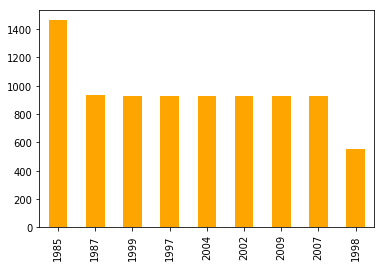

In [16]:
#'Outlet_Establishment_Year'
#unique
print("length of unique values >>>:",len(data['Outlet_Establishment_Year'].unique()))
print("unique values >>>:",data['Outlet_Establishment_Year'].unique())
#value_counts
print("value counts >>>:")
print(data['Outlet_Establishment_Year'].value_counts())
data['Outlet_Establishment_Year'].value_counts().plot(kind='bar',color='orange')

length of unique values >>>: 4
unique values >>>: ['Medium' nan 'High' 'Small']
value counts >>>:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


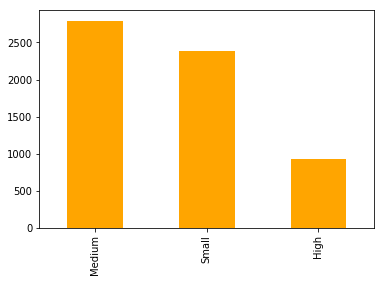

In [17]:
#'Outlet_Size'
#unique
print("length of unique values >>>:",len(data['Outlet_Size'].unique()))
print("unique values >>>:",data['Outlet_Size'].unique())
#value_counts
print("value counts >>>:")
print(data['Outlet_Size'].value_counts())
data['Outlet_Size'].value_counts().plot(kind='bar',color='orange')

#Null values are present so it should be replaced.

length of unique values >>>: 3
unique values >>>: ['Tier 1' 'Tier 3' 'Tier 2']
value counts >>>:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


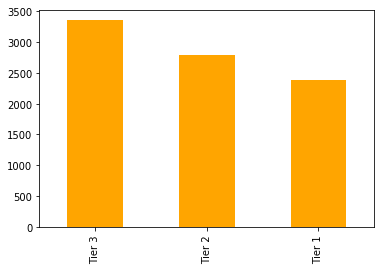

In [18]:
#'Outlet_Location_Type'
#unique
print("length of unique values >>>:",len(data['Outlet_Location_Type'].unique()))
print("unique values >>>:",data['Outlet_Location_Type'].unique())
#value_counts
print("value counts >>>:")
print(data['Outlet_Location_Type'].value_counts())
data['Outlet_Location_Type'].value_counts().plot(kind='bar',color='orange')

#### Insights:After checking the categories in each column of categorical data we get following insights,
1. Same categories with different names are present in 'Item_Fat_Content' column, So we need to correct it.
2. 'Outlet_Size' column has missing values. 

# 3. Data Preprocessing 

### 1). Correct the categories in column 'Item_Fat_Content'

value counts:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


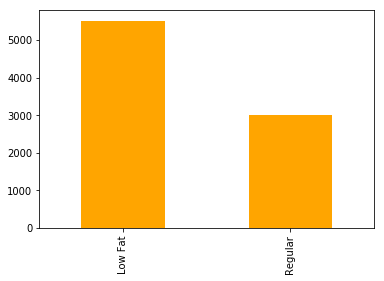

In [19]:
#Replacing all representations of variable 'Low Fat':
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
#Replacing all representations of 'Regular':
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

#Check unique values for variable Item_Fat_Content
data['Item_Fat_Content'].unique()
#value counts
print("value counts:")
print(data['Item_Fat_Content'].value_counts())   #Printing the frequency of each categary in column Item_Fat_Content:
data['Item_Fat_Content'].value_counts().plot(kind='bar',color='orange')

### 2). Treatment for missing values in column "Outlet_Size"

In [20]:
#Check null value count in column 'Outlet_Size':
data['Outlet_Size'].isna().sum()

2410

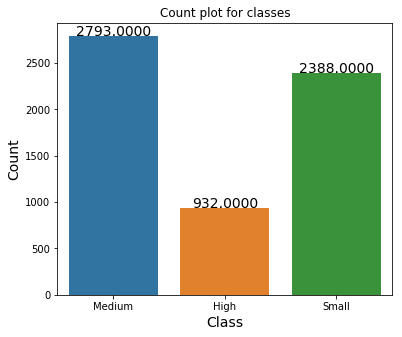

In [21]:
#Count plot for classes
plt.figure(figsize=(6,5))
axis =sns.countplot(data.Outlet_Size)
plt.title("Count plot for classes")
plt.xlabel("Class",fontsize=14)
plt.ylabel("Count",fontsize=14)

for p in axis.patches:
    height = p.get_height()
    axis.text( p.get_x() + p.get_width()/2, height+2,'{:1.4f}'.format(height), ha="center",fontsize=14) 
    
plt.show()

In [22]:
#Using most frequent value in column Outlet_size i.e mode:
mode = data['Outlet_Size'].mode()
mode

0    Medium
dtype: object

In [23]:
#See Outlet_Type for misssing values in 'Outlet_Size'  
#AND we decide obtain mode for "Outlet_Size" having "Outlet_Type" =Supermarket Type1 & Grocery Store
missing=data.loc[(data['Outlet_Size'].isnull())]
missing['Outlet_Type'].value_counts()

#data with outlet type=> Supermarket Type1 or Grocery Store
data_Sty1_groc=data.loc[(data['Outlet_Type']=="Supermarket Type1")|(data['Outlet_Type']=="Grocery Store")] 
data_Sty1_groc["Outlet_Size"].value_counts()

# See the Outlet_Size for Outlet_Type => Supermarket Type1 or Grocery Store
data_Sty1_groc.groupby(["Outlet_Type"])["Outlet_Size"].value_counts()

#mode
mode=data_Sty1_groc["Outlet_Size"].mode()
#Fill NA/NaN values using the specified method.
data['Outlet_Size'] = data['Outlet_Size'].fillna(mode[0])
data['Outlet_Size'].isnull().sum()

0

### 3).Treatment for missing values in column Item_Weight

In [24]:
#Check null values count in column 'Item_Weight':
data['Item_Weight'].isnull().sum()

1463

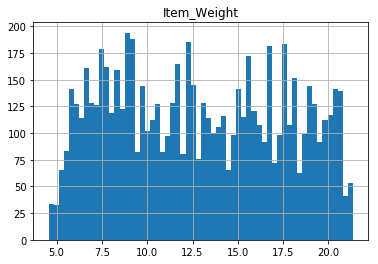

In [25]:
#data['Item_Weight'].hist(bins=60)
data.hist(column='Item_Weight',bins=60)
plt.show()

In [26]:
#Using 'Mean' to calculate the Mean of the Items weight:
mean_weight = data['Item_Weight'].mean()
mean_weight

12.857645184136183

In [27]:
#Fill missing values with 'mean' value of Item weights:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
#Check null values again:
data['Item_Weight'].isnull().sum()

0

In [28]:
#Check null values count for whole dataframe again:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
####################################################################################################

### 4).Create a new column named 'Outlet_Age'
 Outlet_age = Current_Year - Outlet_Establishment_Year

In [30]:
#Create a new column named 'Outlet_Age' and filled with it outlet age:
#We can calculate outlet age based on 'current year' minus 'outlet establishment year'.
#(Outlet_age = Current_Year - Outlet_Establishment_Year)
data['Outlet_age'] = 2013 - data['Outlet_Establishment_Year']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


## 5). Outlier detection for numerical data

In [31]:
data.select_dtypes(include=[np.number]).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_age'],
      dtype='object')

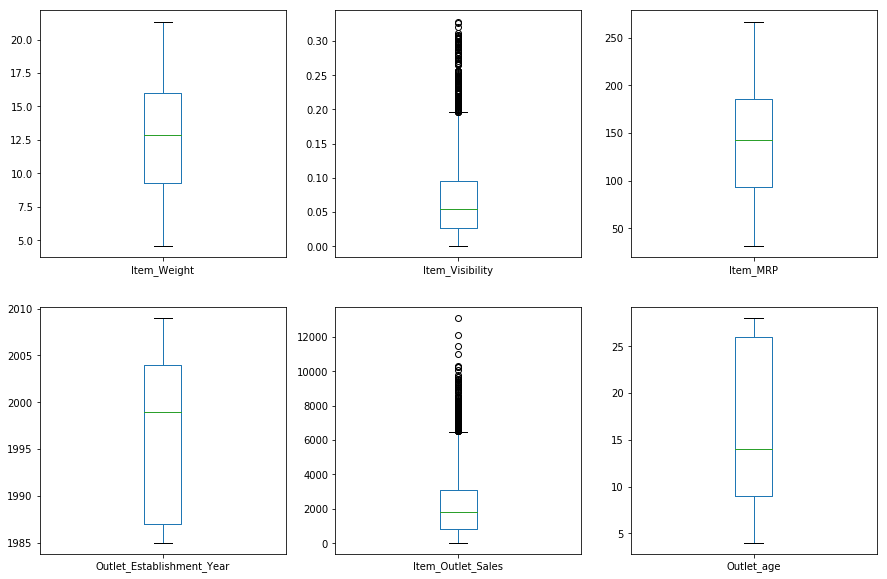

In [32]:
cols=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_age']
i=0
for col in cols:
    i=i+1
    plt.subplot(2,3,i)
    data[col].plot(kind='box',figsize=(15,10))
    #plt.show()

### 5).Outlier treatment on column  Item_visibility

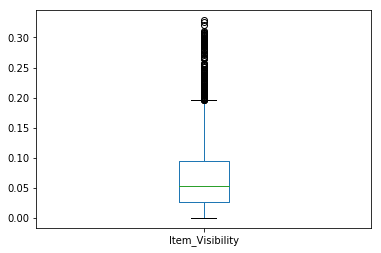

In [33]:
data["Item_Visibility"].plot(kind="Box")

In [34]:
#=================Removing the Outliers==================#:
print("data_shape before outlier treatment :",data.shape)
#Define first Quartile range:
Q1 = data['Item_Visibility'].quantile(0.25)
#Define third Quartile range:
Q3 = data['Item_Visibility'].quantile(0.75)
#Define IQR range:
IQR = Q3 - Q1
#Remove the outliers:
#Output:::DataFrame resulting from the provided query expression.
data = data.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')
print("data_shape after outlier treatment :",data.shape)

data_shape before outlier treatment : (8523, 13)
data_shape after outlier treatment : (8379, 13)


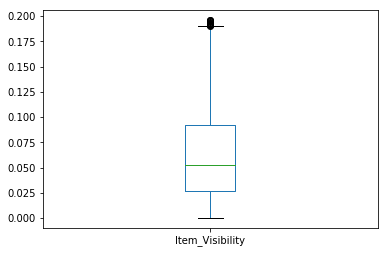

In [35]:
data["Item_Visibility"].plot(kind="Box")

# Binning

### 6).Let's perform binning on variable "Item_Visibility" and create new column  "Item_Visibility_bins". 

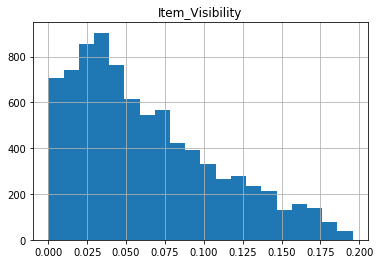

In [36]:
#Plotting **Histogram** reveals the **Distribution** of the column Item_visibility:
data.hist(column='Item_Visibility',bins=20)
plt.show()

In [37]:
#Check for minimum value in column 'Item_Visibility':
data['Item_Visibility'].max()

0.195721125

In [38]:
#Check for minimum value in column 'Item_Visibility':
data['Item_Visibility'].min()

0.0

In [39]:
bandwidth=(data['Item_Visibility'].max()-data['Item_Visibility'].min())/3
bandwidth

0.065240375

- How to calculate the intervals:
    1. Desired intervals : 3
    2. Interval width : $$\frac{(LargestNumber - SmallestNumber)}{Number Of Desired Intervals}$$
        2.1 So, in our case the interval width is: **0.065**
    3. So,our intervals would be:
        1. 0.000 to 0.065
        2. 0.065 to 0.13
        3. 0.13  to 0.195

### Item_Visibility_bins

In [40]:
#Modifying the values under the column Item_Visibility into categories as low_visibility,medium_visibility and high_visibility:
#If:
#   0.000 < Item_Visibility <= 0.065:
#       return 'Low_Viz'
#If:
#   0.065 < Item_Visibility <= 0.13:
#       return 'Med_Viz'
#If:
#   0.13 < Item_Visibility <= 0.195:
#        return 'High_Viz'
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'],bins=[0.000,0.065,0.13,0.195],
                                                      labels=['Low_Viz','Med_Viz','High_Viz'])

In [41]:
#Check for any null value:
data['Item_Visibility_bins'].isnull().sum()

529

In [42]:
#View value count of each visibility bin:
data['Item_Visibility_bins'].value_counts()

Low_Viz     4403
Med_Viz     2557
High_Viz     890
Name: Item_Visibility_bins, dtype: int64

In [43]:
#Printing the category under the column Item_Visibility_bins with maximum value_count:
data['Item_Visibility_bins'].value_counts().index[0]

'Low_Viz'

In [44]:
#Fill NA/NaN values using the specified method.
data['Item_Visibility_bins'] = data['Item_Visibility_bins'].fillna(data['Item_Visibility_bins'].value_counts().index[0])

In [45]:
data['Item_Visibility_bins'].isnull().sum()

0

length of unique values : 3
unique values : [Low_Viz, Med_Viz, High_Viz]
Categories (3, object): [Low_Viz < Med_Viz < High_Viz]
value counts:
Low_Viz     4932
Med_Viz     2557
High_Viz     890
Name: Item_Visibility_bins, dtype: int64


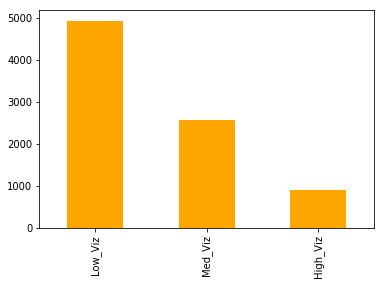

In [46]:
#'Item_Visibility_bins'
#unique
print("length of unique values :",len(data['Item_Visibility_bins'].unique()))
print("unique values :",data['Item_Visibility_bins'].unique())
#value counts
print("value counts:")
print(data['Item_Visibility_bins'].value_counts())   #Printing the frequency of each categary in column Item_Fat_Content:
data['Item_Visibility_bins'].value_counts().plot(kind='bar',color='orange')

### 7).Let's perform binning on variable 'Item_MRP' and create new column  'Item_Price'. 

In [47]:
#'Item_MRP'

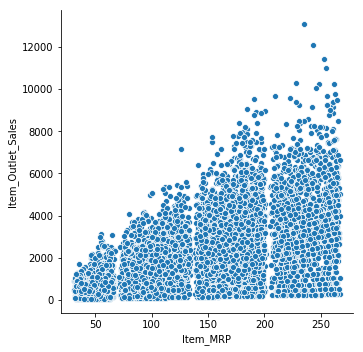

In [48]:
sns.pairplot(data,x_vars='Item_MRP',y_vars='Item_Outlet_Sales',height=5)

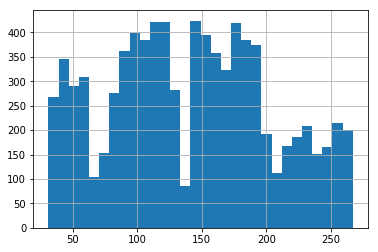

In [49]:
# fromthe below histogram we can that it a multimodal distribution 
data['Item_MRP'].describe()
data['Item_MRP'].hist(bins=30)
# Sales by Item_MRP
#sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=train)

In [50]:
print("min",data["Item_MRP"].min())
print("max",data["Item_MRP"].max())
print("bandwidth",(data["Item_MRP"].max()-data["Item_MRP"].min())/4)

min 31.29
max 266.8884
bandwidth 58.8996


In [51]:
data['Item_Price']=pd.cut(data.Item_MRP,bins=[31.29,90.1896,149.0892,207.9888,266.8884],labels=['a','b','c','d'],right=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins,Item_Price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Low_Viz,d
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Low_Viz,a
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Low_Viz,b
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Low_Viz,c
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Low_Viz,a


In [52]:
#Check total no. of null values in column 'Item_Price'
data['Item_Price'].isnull().sum()

1

In [53]:
##Check null values
data.loc[data['Item_Price'].isnull()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins,Item_Price
153,DRK12,12.857645,Low Fat,0.041683,Soft Drinks,31.29,OUT027,1985,Medium,Tier 3,Supermarket Type3,898.83,28,Low_Viz,NaN


In [54]:
#Drop those null values:
data.dropna(inplace=True)
#Check Shape again:
print("shape :",data.shape)

shape : (8378, 15)


In [55]:
#Check null values
data['Item_Price'].isnull().sum()

0

In [56]:
#Drop'Item_MRP'
data=data.drop(['Item_MRP'],axis=1)

length of unique values : 4
unique values : [d, a, b, c]
Categories (4, object): [a < b < c < d]
value counts:
b    2587
c    2478
a    1940
d    1373
Name: Item_Price, dtype: int64


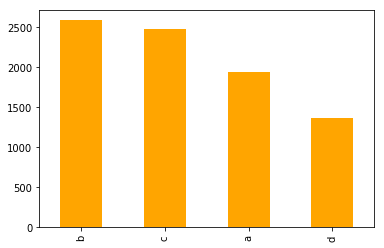

In [57]:
#'Item_Price'
#unique
print("length of unique values :",len(data['Item_Price'].unique()))
print("unique values :",data['Item_Price'].unique())
#value counts
print("value counts:")
print(data['Item_Price'].value_counts())   #Printing the frequency of each categary in column Item_Fat_Content:
data['Item_Price'].value_counts().plot(kind='bar',color='orange')

In [58]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_age', 'Item_Visibility_bins',
       'Item_Price'],
      dtype='object')

In [59]:
#######################################################################################################

# 4. Descriptive Statistics

In [60]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_age', 'Item_Visibility_bins',
       'Item_Price'],
      dtype='object')

In [61]:
data.describe()

,Item_Weight,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,12.864795,0.063064,1997.949988,2213.048551,15.050012
std,4.242257,0.046132,8.351777,1703.600548,8.351777
min,4.555000,0.000000,1985.000000,33.290000,4.000000
25%,9.300000,0.026789,1987.000000,874.861200,9.000000
50%,12.857645,0.052735,1999.000000,1830.950000,14.000000
75%,16.100000,0.092280,2004.000000,3124.599400,26.000000
max,21.350000,0.195721,2009.000000,13086.964800,28.000000


# 5. Exploratory Data Analysis

In [62]:
data.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Outlet_age                      int64
Item_Visibility_bins         category
Item_Price                   category
dtype: object

#### #Exploratory data analysis for numerical variables:-  "Item_Weight" , "Item_Visibility"  , "Outlet_Establishment_Year" ,"Outlet_age"

#### 'Item_Weight'

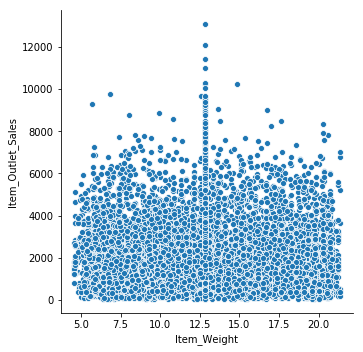

In [63]:
sns.pairplot(data,x_vars='Item_Weight', y_vars='Item_Outlet_Sales',height=5)

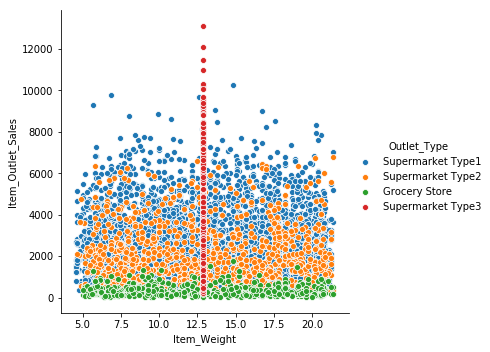

In [64]:
sns.pairplot(data,x_vars='Item_Weight', y_vars='Item_Outlet_Sales',hue="Outlet_Type",height=5)

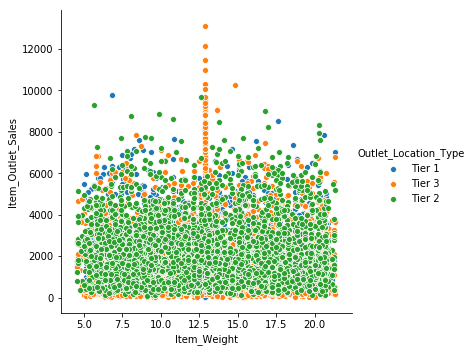

In [65]:
sns.pairplot(data,x_vars='Item_Weight', y_vars='Item_Outlet_Sales',hue="Outlet_Location_Type",height=5)

#### "Item_Visibility"

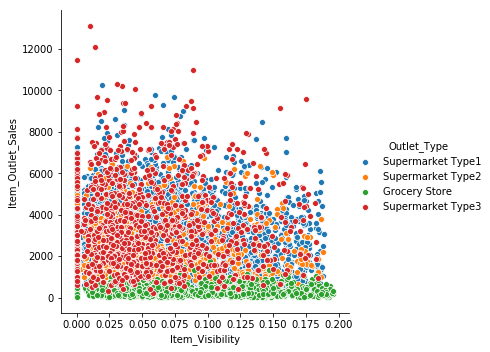

In [66]:
sns.pairplot(data,x_vars="Item_Visibility", y_vars='Item_Outlet_Sales',hue="Outlet_Type",height=5,aspect=1)

 Interpretation: As item visibility increases for different Outlet_type , we dont appear any significant increase in Sale .

#### "Outlet_Establishment_Year"

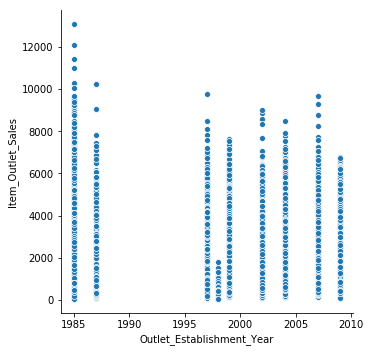

In [67]:
sns.pairplot(data,x_vars="Outlet_Establishment_Year", y_vars='Item_Outlet_Sales',height=5,aspect=1)

Interpretations:Here, we seen that Item_Outlet_Sales for year 1985 is little bit larger than others.

#### "Outlet_age"

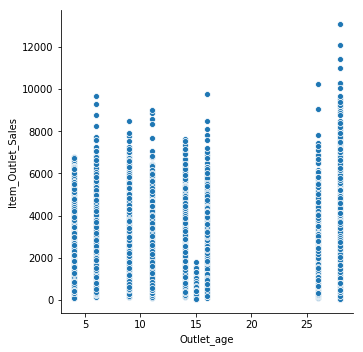

In [68]:
sns.pairplot(data,x_vars="Outlet_age", y_vars='Item_Outlet_Sales',height=5,aspect=1)

Interpretations : Item_Outlet_Sales for highest Outlet age is high. and Item_Outlet_Sales for Outlet age 15 is less.

#### #Exploratory data analysis for categorical variables:- "Item_Fat_Content" ,"Outlet_Size","Outlet_Location_Type ", "Outlet_Type" ,"Item_Type","Item_Visibility_bins","Item_Price"

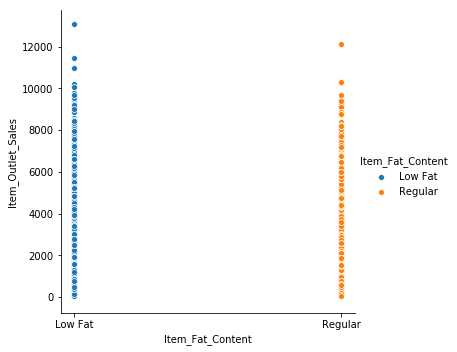

In [69]:
#"Item_Fat_Content"
sns.pairplot(data,x_vars="Item_Fat_Content" , y_vars='Item_Outlet_Sales',hue="Item_Fat_Content" ,height=5)

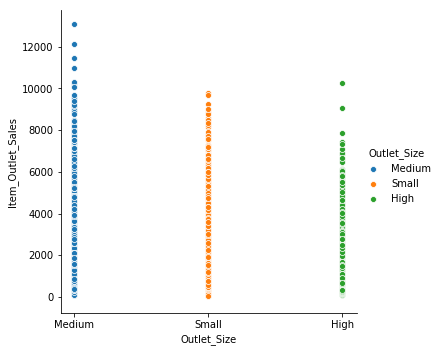

In [70]:
#"Outlet_Size"
sns.pairplot(data,x_vars="Outlet_Size" , y_vars='Item_Outlet_Sales',hue="Outlet_Size" ,height=5)

### Visualization for "Item_Outlet_Sales" w.r.t 'Outlet_Location_Type' & 'Outlet_Type'

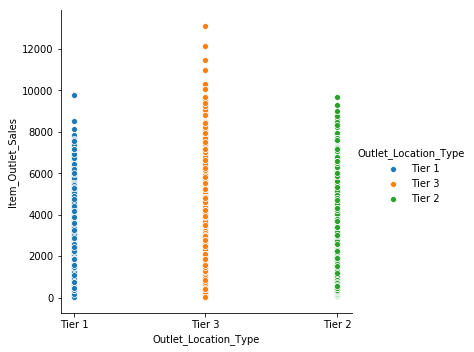

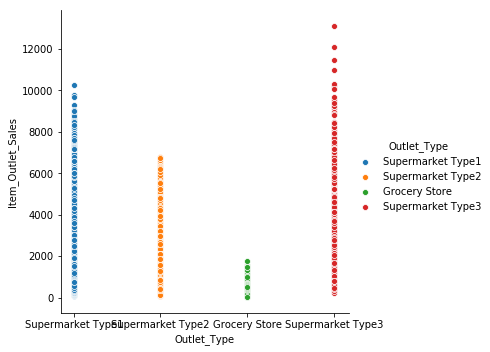

In [71]:
sns.pairplot(data,x_vars="Outlet_Location_Type", y_vars='Item_Outlet_Sales',hue="Outlet_Location_Type",height=5)

sns.pairplot(data,x_vars="Outlet_Type", y_vars='Item_Outlet_Sales',hue="Outlet_Type",height=5)

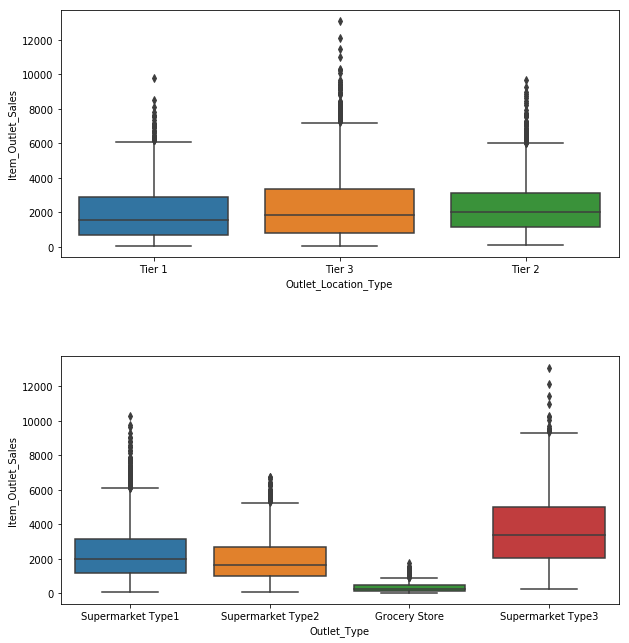

In [72]:
plt.figure(figsize = (10,6))

plt.subplot(211)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)
plt.subplot(212)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show()

In [73]:
#Determine value_counts for  Outlet_Type according to ['Outlet_Location_Type']
data.groupby(['Outlet_Location_Type'])['Outlet_Type'].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860
                      Grocery Store         451
Tier 2                Supermarket Type1    2785
Tier 3                Supermarket Type3     934
                      Supermarket Type1     932
                      Supermarket Type2     928
                      Grocery Store         488
Name: Outlet_Type, dtype: int64

In [74]:
#Determine average Item_Outlet_Sales according to ['Outlet_Location_Type', 'Outlet_Type']
#data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type',columns=['Outlet_Location_Type'],aggfunc='mean')
data.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         337.415925
                      Supermarket Type1    2313.099451
Tier 2                Supermarket Type1    2323.990559
Tier 3                Grocery Store         341.298903
                      Supermarket Type1    2298.995256
                      Supermarket Type2    1995.498739
                      Supermarket Type3    3697.031286
Name: Item_Outlet_Sales, dtype: float64

#### Visualization for  'Item_Outlet_Sales' w.r.t. 'Item_Type'

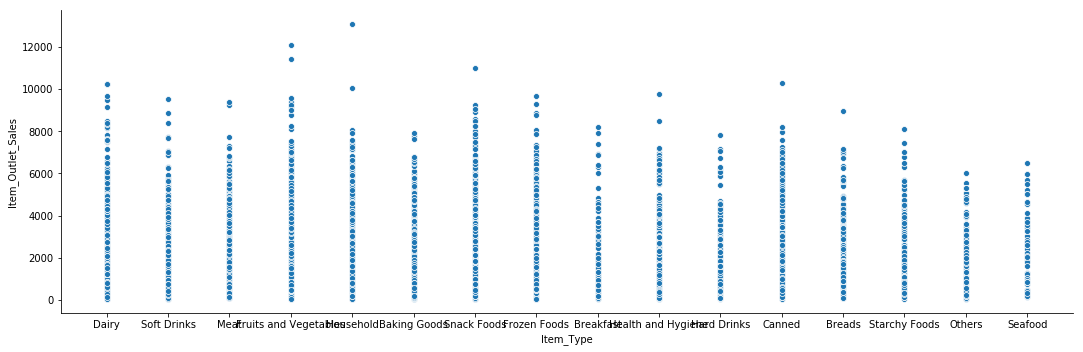

In [75]:
sns.pairplot(data,x_vars="Item_Type", y_vars='Item_Outlet_Sales',height=5,aspect=3)

Interpretation: We don't appear any relationship between Item_type and Item_Outlet_Sales

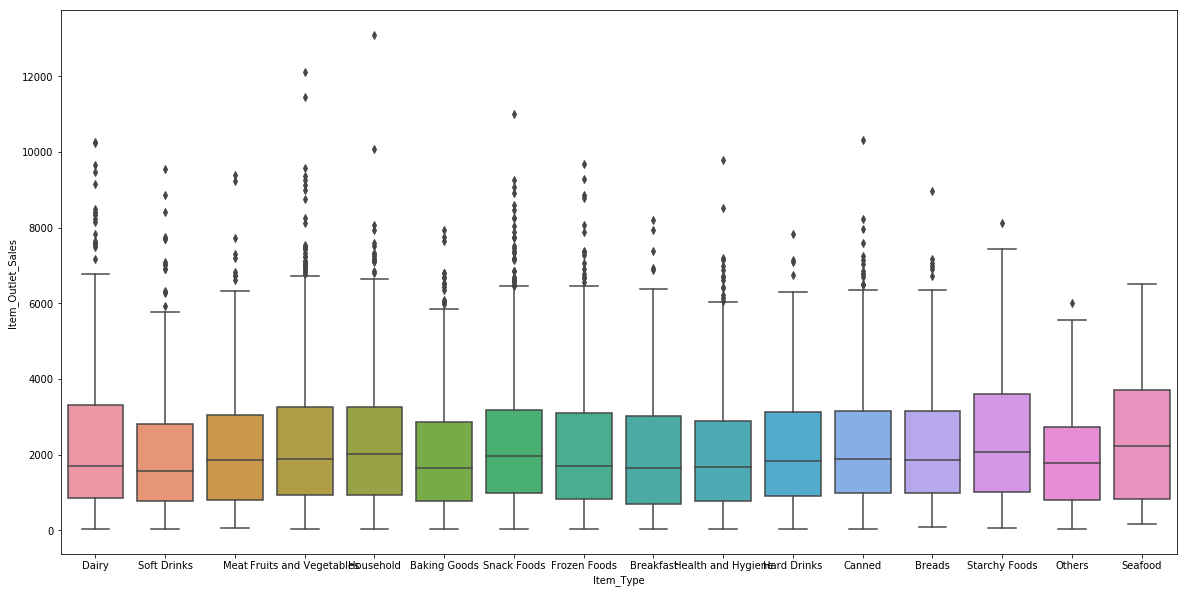

In [76]:
plt.figure(figsize=(20,10))
#sns.boxplot(x='Item_Type',y='Item_Weight',data=data)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data)

In [77]:
#Determine average sale for each item type
data.groupby(['Item_Type'])['Item_Outlet_Sales'].mean()


Item_Type
Baking Goods             1997.051800
Breads                   2226.811055
Breakfast                2180.513843
Canned                   2256.525603
Dairy                    2265.869441
Frozen Foods             2155.438858
Fruits and Vegetables    2327.872696
Hard Drinks              2167.469301
Health and Hygiene       2023.268136
Household                2284.915004
Meat                     2190.564827
Others                   1947.664341
Seafood                  2432.374780
Snack Foods              2309.293193
Soft Drinks              2030.668719
Starchy Foods            2442.484972
Name: Item_Outlet_Sales, dtype: float64

In [78]:
#Determine how many items of each Item Type are sold.
data['Item_Type'].value_counts()  

Fruits and Vegetables    1208
Snack Foods              1181
Household                 897
Frozen Foods              845
Dairy                     670
Canned                    638
Baking Goods              631
Health and Hygiene        516
Soft Drinks               438
Meat                      418
Breads                    248
Hard Drinks               211
Others                    167
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [79]:
#Determine the sale according to the Item type
df=data.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().round()
df

Item_Type
Baking Goods             1260140.0
Breads                    552249.0
Breakfast                 231134.0
Canned                   1439663.0
Dairy                    1518133.0
Frozen Foods             1821346.0
Fruits and Vegetables    2812070.0
Hard Drinks               457336.0
Health and Hygiene       1044006.0
Household                2049569.0
Meat                      915656.0
Others                    325260.0
Seafood                   148375.0
Snack Foods              2727275.0
Soft Drinks               889433.0
Starchy Foods             349275.0
Name: Item_Outlet_Sales, dtype: float64

Text(0.5,1,'Plot of Item_Outlet_Sales w.r.t each Item_type ')

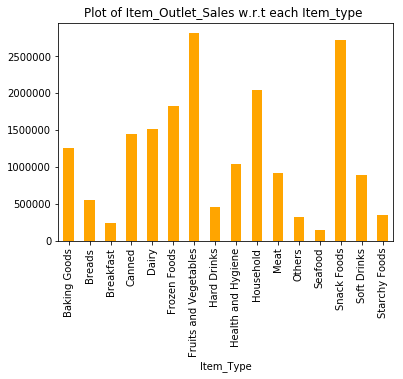

In [80]:
df.plot(kind='bar',color='orange')
plt.title("Plot of Item_Outlet_Sales w.r.t each Item_type ")

#Fruits and vegetables has more contribution in sale and then Snack Foods
#Seafood has low contribution in sale

#### #"Item_Visibility_bins"

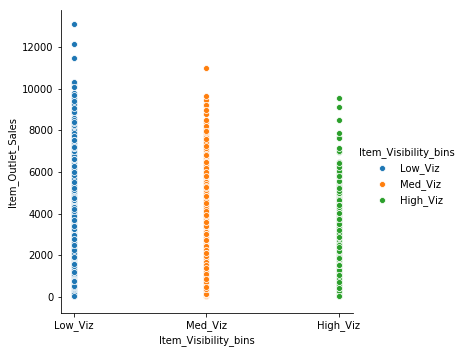

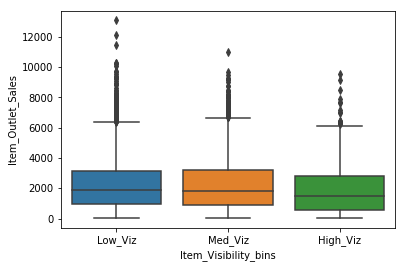

In [81]:
#"Item_Visibility_bins"
sns.pairplot(data,x_vars="Item_Visibility_bins" , y_vars='Item_Outlet_Sales',hue="Item_Visibility_bins" ,height=5)
plt.show()
sns.boxplot(x="Item_Visibility_bins", y='Item_Outlet_Sales', data=data)
plt.show()

#### 'Item_Price'

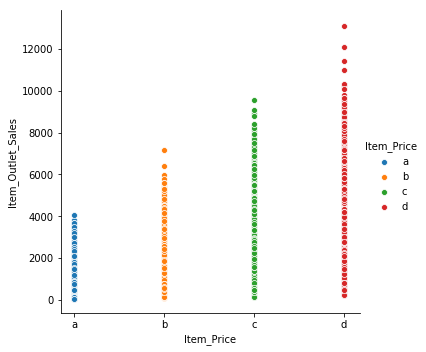

In [82]:
sns.pairplot(data,x_vars='Item_Price', y_vars='Item_Outlet_Sales',hue='Item_Price',height=5)

Interpretations: Here, we clearly seen increase in Sale with increase Item_Price.

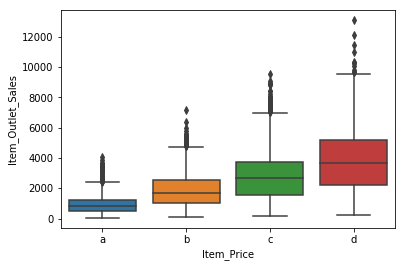

In [83]:
sns.boxplot(x='Item_Price', y='Item_Outlet_Sales', data=data)

#Here we can see the upward trend for 'Item_Outlet_Sales' w.r.t 'Item_Price'

In [84]:
#Determine average Item_Outlet_Sales according to 'Item_Price'
data.groupby(['Item_Price'])['Item_Outlet_Sales'].mean()

Item_Price
a     922.799830
b    1838.754298
c    2766.759037
d    3742.026824
Name: Item_Outlet_Sales, dtype: float64

i.e Average Item_Outlet_Sale_Price for: a<b<c<d

In [85]:
#Determine value_counts for 'Item_Price' 
data['Item_Price'].value_counts()

b    2587
c    2478
a    1940
d    1373
Name: Item_Price, dtype: int64

Items sold are of Item Price : d<a<c<b

There are 2587(maximum) items sold are of b
And 1373(minimum) items sold are of d

Item_Price
a    1790232.0
b    4756857.0
c    6856029.0
d    5137803.0
Name: Item_Outlet_Sales, dtype: float64


Text(0.5,1,'Plot of Item_Outlet_Sales w.r.t each Item_type ')

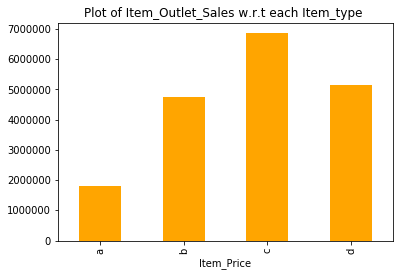

In [86]:
#Determine the sale according to the Item_Price
df=data.groupby(['Item_Price'])['Item_Outlet_Sales'].sum().round()
print(df)
#plot
df.plot(kind='bar',color='orange')
plt.title("Plot of Item_Outlet_Sales w.r.t each Item_type ")

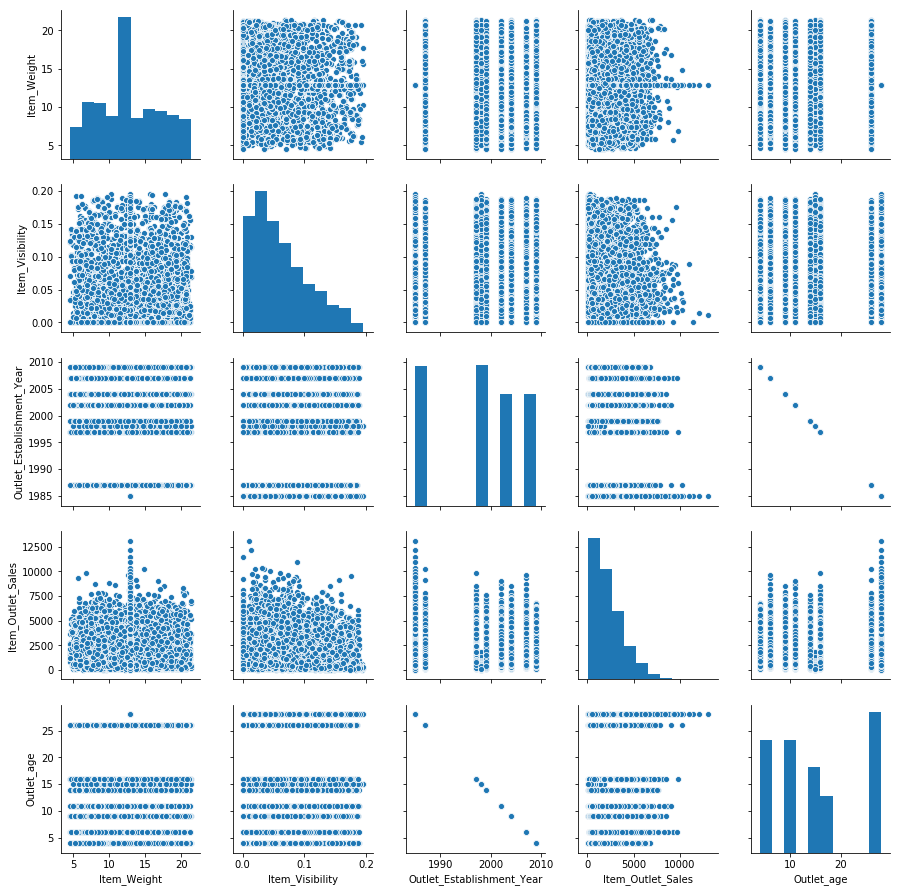

In [87]:
sns.pairplot(data)

In [88]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_age', 'Item_Visibility_bins',
       'Item_Price'],
      dtype='object')

# 6. Data Preparation for Model Buliding 

### Now, let's start to convert all categorical variables into numerical:
* Ordinal data : Use Label Encoding 
* Nominal Data : Use One-Hot Encoding 

In [89]:
#data.dtypes
pd.DataFrame(data.dtypes,columns=["Data type"])

,Data type
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object
Outlet_Type,object


In [90]:
#Item_Identifier
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [91]:
data=data.drop(["Item_Identifier"],axis=1)  #Since it is irrelavant column, we drop it.

In [92]:
#Item_Fat_Content
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [93]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Item_Fat_Content':
#dummy = pd.get_dummies(data['Item_Fat_Content'])
dummy = pd.get_dummies(data['Item_Fat_Content'], drop_first=True)    #I think we should drop any one category from dummy columns bcz to aviod dummy colm trap.
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)
data=data.drop(['Item_Fat_Content'],axis=1)
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age',
       'Item_Visibility_bins', 'Item_Price', 'Regular'],
      dtype='object')

In [94]:
#Item_Type
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [95]:
#ONE-HOT-ENCODING:
#Let's create dummies for "Item_Type":
#dummy = pd.get_dummies(data["Item_Type"])
dummy = pd.get_dummies(data["Item_Type"], drop_first=True)    #I think we should drop any one category from dummy columns bcz to aviod dummy colm trap.
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)
data=data.drop(["Item_Type"],axis=1)
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age',
       'Item_Visibility_bins', 'Item_Price', 'Regular', 'Breads', 'Breakfast',
       'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others',
       'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')

In [96]:
#Outlet_Identifier
data["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [97]:
data=data.drop(["Outlet_Identifier"],axis=1)  #Since it is irrelavant column, we drop it.

In [98]:
#Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [99]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Outlet_Size':
#dummy = pd.get_dummies(data['Outlet_Size'])
dummy = pd.get_dummies(data['Outlet_Size'], drop_first=True)    #I think we should drop any one category from dummy columns bcz to aviod dummy colm trap.
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)
data=data.drop(['Outlet_Size'],axis=1)
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_age', 'Item_Visibility_bins', 'Item_Price', 'Regular', 'Breads',
       'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others',
       'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium',
       'Small'],
      dtype='object')

In [100]:
#Outlet_Location_Type
data["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [101]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Outlet_Location_Type':
#dummy = pd.get_dummies(data['Outlet_Location_Type'])
dummy = pd.get_dummies(data['Outlet_Location_Type'], drop_first=True)    #I think we should drop any one category from dummy columns bcz to aviod dummy colm trap.
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)
data=data.drop(['Outlet_Location_Type'],axis=1)
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age',
       'Item_Visibility_bins', 'Item_Price', 'Regular', 'Breads', 'Breakfast',
       'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others',
       'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium',
       'Small', 'Tier 2', 'Tier 3'],
      dtype='object')

In [102]:
#Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [103]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Outlet_Type':
#dummy = pd.get_dummies(data['Outlet_Type'])
dummy = pd.get_dummies(data['Outlet_Type'], drop_first=True)   
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)

In [104]:
data=data.drop(['Outlet_Type'],axis=1)
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_age', 'Item_Visibility_bins', 'Item_Price',
       'Regular', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods',
       'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene',
       'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks',
       'Starchy Foods', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [105]:
#Item_Visibility_bins
data["Item_Visibility_bins"].unique()

[Low_Viz, Med_Viz, High_Viz]
Categories (3, object): [Low_Viz < Med_Viz < High_Viz]

In [106]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Item_Visibility_bins':
#dummy = pd.get_dummies(data['Item_Visibility_bins'])
dummy = pd.get_dummies(data['Item_Visibility_bins'], drop_first=True)    #I think we should drop any one category from dummy columns bcz to aviod dummy colm trap.
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)
data=data.drop(['Item_Visibility_bins'],axis=1)
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_age', 'Item_Price', 'Regular', 'Breads',
       'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others',
       'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium',
       'Small', 'Tier 2', 'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'Med_Viz', 'High_Viz'],
      dtype='object')

In [107]:
data=data.drop(["Item_Visibility"],axis=1)

In [108]:
#'Item_Price'
data['Item_Price'].unique()

[d, a, b, c]
Categories (4, object): [a < b < c < d]

In [109]:
#ONE-HOT-ENCODING:
#Let's create dummies for 'Item_Price':
#dummy = pd.get_dummies(data['Item_Price'])
dummy = pd.get_dummies(data['Item_Price'], drop_first=True)    #I think we should drop any one category from dummy columns bcz to aviod dummy colm trap.
#Merging both Dataframes--- dataset + dummy
data = pd.concat([data,dummy],axis=1)
data=data.drop(['Item_Price'],axis=1)
data.columns

Index(['Item_Weight', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Outlet_age', 'Regular', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium', 'Small',
       'Tier 2', 'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'Med_Viz', 'High_Viz', 'b', 'c', 'd'],
      dtype='object')

In [110]:
data=data.drop(['Outlet_Establishment_Year'],1)

In [111]:
#data.dtypes
pd.DataFrame(data.dtypes,columns=["Data type"])

,Data type
Item_Weight,float64
Item_Outlet_Sales,float64
Outlet_age,int64
Regular,uint8
Breads,uint8
Breakfast,uint8
Canned,uint8
Dairy,uint8
Frozen Foods,uint8
Fruits and Vegetables,uint8


In [112]:
#Create Dependent and Independent variables(we drop target column for this):
X_train = data.drop('Item_Outlet_Sales',axis=1)
y_train = data.Item_Outlet_Sales
X_train.shape,y_train.shape

((8378, 30), (8378,))

# Feature Selection

In [113]:
#Import 'f_regression' module from Sklearn library:
from sklearn.feature_selection import f_regression
#Fit the Training data and Training labels:
#The first array contains the F-Statistics for each of the Regressor.
#The second array contains the P-Values associated with F-Statistics.
f_regression(X_train,y_train)

(array([7.86804996e-01, 3.61302863e+01, 3.91094280e+00, 1.66766903e-02,
        3.91511169e-02, 4.49755188e-01, 7.00057617e-01, 1.07470323e+00,
        6.41652298e+00, 1.54922766e-01, 6.82851590e+00, 1.78784914e+00,
        7.66225600e-02, 4.13654707e+00, 1.01847424e+00, 4.38967153e+00,
        5.29949993e+00, 2.63928898e+00, 3.30110206e+02, 3.34671009e+02,
        1.77273402e+01, 2.12966515e+01, 6.15762808e+01, 1.70508204e+01,
        8.81468394e+02, 1.58399764e+00, 4.19574409e+01, 1.84625193e+02,
        3.88937585e+02, 1.57055870e+03]),
 array([3.75093444e-001, 1.92276004e-009, 4.80054058e-002, 8.97251349e-001,
        8.43154386e-001, 5.02469725e-001, 4.02788205e-001, 2.99915437e-001,
        1.13244244e-002, 6.93884705e-001, 8.98741233e-003, 1.81224754e-001,
        7.81934519e-001, 4.19981407e-002, 3.12910349e-001, 3.61872325e-002,
        2.13559578e-002, 1.04287817e-001, 2.20633122e-072, 2.44488192e-073,
        2.57602102e-005, 3.99268955e-006, 4.78426384e-015, 3.67459953e-005

In [114]:
#We only interested in P-Values:
p_vals = f_regression(X_train,y_train)[1]
p_vals

array([3.75093444e-001, 1.92276004e-009, 4.80054058e-002, 8.97251349e-001,
       8.43154386e-001, 5.02469725e-001, 4.02788205e-001, 2.99915437e-001,
       1.13244244e-002, 6.93884705e-001, 8.98741233e-003, 1.81224754e-001,
       7.81934519e-001, 4.19981407e-002, 3.12910349e-001, 3.61872325e-002,
       2.13559578e-002, 1.04287817e-001, 2.20633122e-072, 2.44488192e-073,
       2.57602102e-005, 3.99268955e-006, 4.78426384e-015, 3.67459953e-005,
       2.87498784e-184, 2.08220882e-001, 9.85404043e-011, 1.30557331e-041,
       1.15136084e-084, 5.81586183e-315])

In [115]:
#Rounding upto 3 digits after decimal point:
p_vals.round(3)

array([0.375, 0.   , 0.048, 0.897, 0.843, 0.502, 0.403, 0.3  , 0.011,
       0.694, 0.009, 0.181, 0.782, 0.042, 0.313, 0.036, 0.021, 0.104,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.208, 0.   ,
       0.   , 0.   , 0.   ])

In [116]:
p_vals_df = pd.DataFrame(data=X_train.columns.values,columns=['Features'])
p_vals_df['P-Values'] = p_vals.round(3)
p_vals_df

,Features,P-Values
0,Item_Weight,0.375
1,Outlet_age,0.000
2,Regular,0.048
3,Breads,0.897
4,Breakfast,0.843
5,Canned,0.502
6,Dairy,0.403
7,Frozen Foods,0.300
8,Fruits and Vegetables,0.011
9,Hard Drinks,0.694


In [117]:
#Drop Column 'Item_Weight':
X_train = X_train.drop(['Item_Weight','Breads',"Breakfast",'Canned','Dairy','Frozen Foods',"Hard Drinks","Household",'Meat',"Seafood","Starchy Foods","Med_Viz"],axis=1)
X_train.head()

,Outlet_age,Regular,Fruits and Vegetables,Health and Hygiene,Others,Snack Foods,Soft Drinks,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,High_Viz,b,c,d
0,14,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,4,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
2,14,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,26,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [118]:
#Creating Train-Test split
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_train,y_train,test_size=0.3,random_state=22)

# 7. Model Building and Evauation

# LinearRegression

In [119]:
#Instantiate Linear Regressor:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#fitting model
lin_reg.fit(Xtrain,ytrain)
#predictions
predictions= lin_reg.predict(Xtrain)
#model evaluation metrics
from sklearn.metrics import r2_score,mean_squared_error
print('linear regression model intercept: {}'.format(lin_reg.intercept_))
print('linear regression model coeff:\n{}'.format(lin_reg.coef_))
print('R-squared score (training): {:.3f}'.format(lin_reg.score(Xtrain, ytrain)))
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrain,predictions))))

#On test data
#Let's find the RMSE of the model:
y_pred = lin_reg.predict(Xtest)
print('R-squared score (testing): {:.3f}'.format(lin_reg.score(Xtest, ytest)))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytest,y_pred))))

linear regression model intercept: 514.721953495047
linear regression model coeff:
[ -28.14904895   84.00941819   72.10070234  -14.18222849   48.12210835
  -42.19754105  115.03472297 -674.63696494 -698.63328061 -174.4550586
 -405.28437675 1592.7395834  1315.16311561 3768.3937399   -15.40942546
  923.70148064 1851.33977561 2820.61693001]
R-squared score (training): 0.531
RMSE TRAIN: 1176.97
R-squared score (testing): 0.546
RMSE TEST: 1122.60


# Using OLS

In [120]:
#Linear Regression using Statsmodels API
import statsmodels.api as sm
XtrainNew =sm.add_constant(Xtrain)
XtestNew =sm.add_constant(Xtest)
ytrainNew=ytrain#ytrain#np.log(ytrain)#np.sqrt(ytrain)#np.log(ytrain)#ytrain**0.5
lm = sm.OLS(ytrainNew, XtrainNew)
model1 = lm.fit()
predictions= model1.predict(XtrainNew)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     367.8
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:41:34   Log-Likelihood:                -49783.
No. Observations:                5864   AIC:                         9.960e+04
Df Residuals:                    5845   BIC:                         9.973e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   514.72

In [121]:
mean_squared_error(ytrainNew,predictions)

1385254.6974059492

In [122]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytest,model1.predict(XtestNew)))))

RMSE TRAIN: 1176.97
RMSE TEST: 1122.60


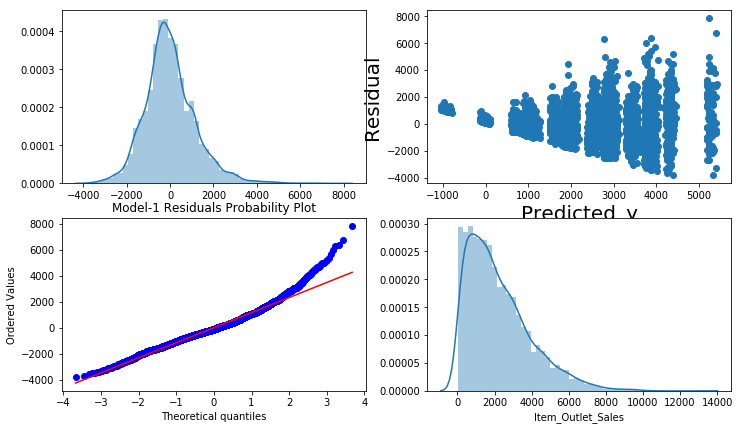

In [123]:
#Get residuals::
residuals = ytrainNew - predictions
#Create dataframe of residuals::
df_residuals = pd.DataFrame(residuals)

#=================<<Plot Residuals>>===============#
#Create figure::
plt.figure(figsize=(12, 7))

#Define subplot:
#For Axis-1:
plt.subplot(221)
sns.distplot(residuals,bins=50)

#For Axis-1:
plt.subplot(222)
plt.scatter(predictions,residuals);
plt.xlabel('Predicted_y',fontsize=20)
plt.ylabel('Residual',fontsize=20)

#For Axis-2:
plt.subplot(223)
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

#For Axis-2:
plt.subplot(224)
sns.distplot(ytrainNew,bins=50)

Plot of residuals vs predicted responce indicates that, residuals form outward opening funnel structure i.e it indicates that variance of error is increasing function of responce variable(violation of constant variance assumption). 

NP-plot indicates that , responce variable not normally distributed.
Distribution of responce variable is positively skewed so we need to transform the response variable

# Variance Stabilizing Transformation 

We need to transform to stabilize the variance

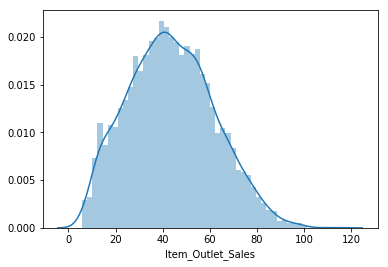

In [124]:
#Square root transformation
ytrainNew=np.sqrt(ytrain)
sns.distplot(ytrainNew,bins=50)
plt.show()

### #Model for square root transformation of responce variable.

In [125]:
#Linear Regression using Statsmodels API
import statsmodels.api as sm
XtrainNew =sm.add_constant(Xtrain)
XtestNew =sm.add_constant(Xtest)
ytrainNew=np.sqrt(ytrain)#np.log(ytrain)#ytrain**0.5
lm = sm.OLS(ytrainNew, XtrainNew)
model2 = lm.fit()
predictions= model2.predict(XtrainNew)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     536.2
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:41:35   Log-Likelihood:                -22489.
No. Observations:                5864   AIC:                         4.502e+04
Df Residuals:                    5845   BIC:                         4.514e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    15.74

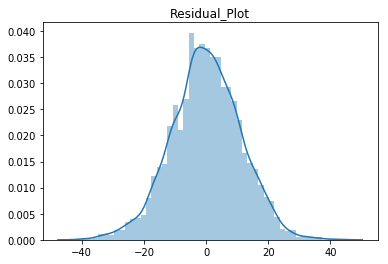

mean : 0.0
std : 11.0


In [126]:
#predictions=model.predict(XtrainNew)
predictions=model2.fittedvalues
residuals=model2.resid
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.round(np.std(residuals)))

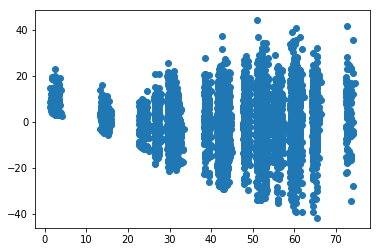

In [127]:
plt.scatter(predictions,residuals)

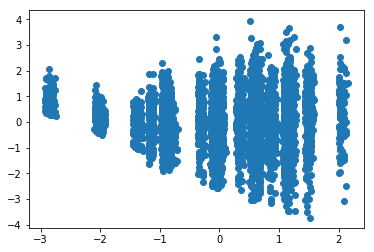

In [128]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))

Text(0.5,1,'Model-1 Residuals Probability Plot')

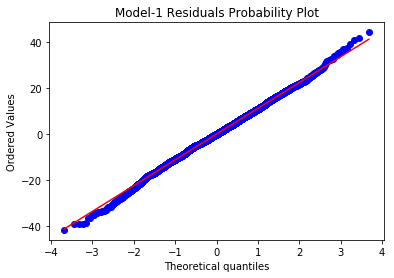

In [129]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

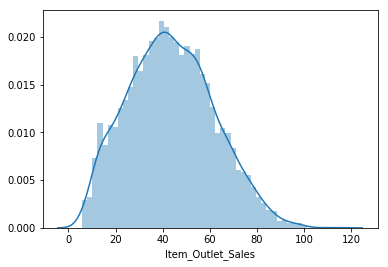

In [130]:
sns.distplot(ytrainNew,bins=50)

In [131]:
#ON TEST DATA
ytestNew=np.sqrt(ytest)
y_pred=model2.predict(XtestNew)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS
R2= 1 - (RSS/TSS);print("R2 :",R2) #1- (RSS/TSS)

R2 : 0.6297016950995298


In [132]:
mean_squared_error(ytrainNew,predictions)

125.52184921822224

In [133]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytestNew,model2.predict(XtestNew)))))

RMSE TRAIN: 11.20
RMSE TEST: 10.99


# Boxcox

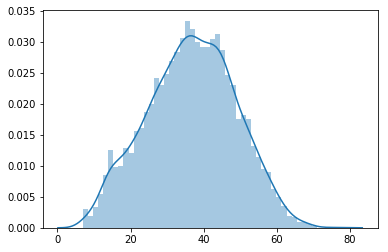

In [134]:
import scipy.stats as ss
yt,_=ss.boxcox(ytrain)
sns.distplot(yt,bins=50)

In [135]:
#OLS
#Linear Regression using Statsmodels API
import statsmodels.api as sm
XtrainNew =sm.add_constant(Xtrain)
XtestNew = sm.add_constant(Xtest)
import scipy.stats as ss
yt,_=ss.boxcox(ytrain)
ytrainNew=yt#**0.5#np.log(ytrain)#np.sqrt(ytrain)#ytrain**0.5#yt
lm = sm.OLS(ytrainNew, XtrainNew)
model3 = lm.fit()
predictions=model3.predict(XtrainNew)
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     602.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:41:36   Log-Likelihood:                -19867.
No. Observations:                5864   AIC:                         3.977e+04
Df Residuals:                    5845   BIC:                         3.990e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.13

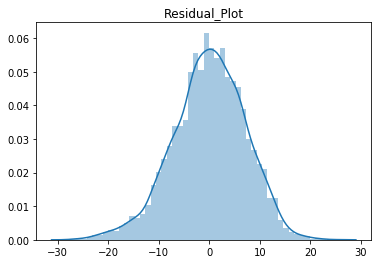

mean : 0.0
std : 7.0


In [136]:
#predictions=model.predict(XtrainNew)
predictions=model3.fittedvalues
residuals=model3.resid
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.round(np.std(residuals)))

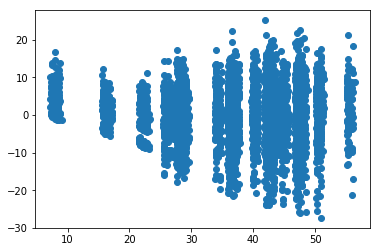

In [137]:
plt.scatter(predictions,residuals)

Text(0.5,1,'Model-1 Residuals Probability Plot')

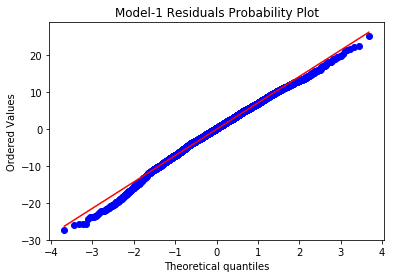

In [138]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [139]:
#ON TEST DATA
ytst,_=ss.boxcox(ytest)
ytestNew=ytst
y_pred=model3.predict(XtestNew)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS
R2= 1 - (RSS/TSS);print("R2 :",R2) #1- (RSS/TSS)

R2 : 0.6400263969615246


In [140]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytestNew,model3.predict(XtestNew)))))

RMSE TRAIN: 7.16
RMSE TEST: 7.63


In [141]:
############################################################################################################################

# Part2: Diagnostics-for-leverage-and-influence

Influence Summary Frame
      dfb_const  dfb_Outlet_age  dfb_Regular  dfb_Fruits and Vegetables  \
5464   0.000356        0.000084    -0.008907                   0.001192   
4127   0.000948       -0.000333    -0.043034                   0.022528   
7087  -0.000184        0.000028     0.008783                   0.006952   
3479  -0.001784       -0.000016     0.004480                   0.002504   
7509  -0.000070        0.000011     0.003349                   0.002651   

      dfb_Health and Hygiene  dfb_Others  dfb_Snack Foods  dfb_Soft Drinks  \
5464               -0.001369   -0.001323        -0.016090        -0.000618   
4127                0.006402    0.004230         0.022823         0.006159   
7087                0.007354    0.003499         0.008162         0.004569   
3479                0.003031    0.001655         0.002309         0.002958   
7509                0.002804    0.001334         0.003112         0.001742   

      dfb_Medium  dfb_Small    ...     dfb_High_Viz     

Text(0,0.5,'Studentized Residuals')

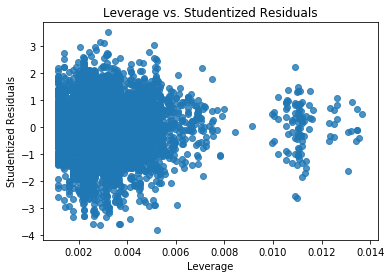

In [142]:
model=model3
#Diagnostics-for-leverage-and-influence
influence = model.get_influence()
inf_sum = influence.summary_frame()
print("Influence Summary Frame")
print(inf_sum.head())


student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [143]:
#Concat MEDV and the resulting residual table
#Note that hat_diag is leverage so change the column heading from hat_diag to leverage
from statsmodels.formula.api import ols
SaleRes = pd.concat([y_train, inf_sum], axis = 1)
SaleRes=SaleRes.rename(columns={'hat_diag': 'leverage'})
SaleRes.head()
#SaleRes.iloc[ytrain.index]

,Item_Outlet_Sales,dfb_const,dfb_Outlet_age,dfb_Regular,dfb_Fruits and Vegetables,dfb_Health and Hygiene,dfb_Others,dfb_Snack Foods,dfb_Soft Drinks,dfb_Medium,...,dfb_High_Viz,dfb_b,dfb_c,dfb_d,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,3735.1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,443.4228,0.001108,-0.001307,-0.018062,0.001406,-0.003239,-0.001516,0.000425,-0.043554,-0.001433,...,0.003512,0.013456,0.015400,0.010500,0.000179,-0.759173,0.005853,-0.058250,-0.759145,-0.058248
2,2097.2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,732.3800,-0.002289,-0.000261,0.006723,0.013797,0.000984,0.000755,-0.000183,0.000470,0.004180,...,-0.004595,-0.000103,0.006956,0.000022,0.000053,0.476450,0.004395,0.031655,0.476419,0.031653
4,994.7052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#Positive high influence observation is indicated by, |Difftsi|>2*np.sqrt(k/n)
k=len(Xtrain.columns)
n=len(Xtrain)
thr=2*np.sqrt(k/n) #threshold

len(SaleRes.Item_Outlet_Sales[(np.abs(SaleRes.dffits)>thr)].index)

#######################################################################
mod_X_train=X_train.drop(SaleRes.Item_Outlet_Sales[(np.abs(SaleRes.dffits)>thr)].index) #modified X_train
mod_y_train=y_train.drop(SaleRes.Item_Outlet_Sales[(np.abs(SaleRes.dffits)>thr)].index) #modified y_train
######################################################################

In [145]:
#Creating Train-Test split for modified data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(mod_X_train,mod_y_train,test_size=0.3,random_state=22)

# Square root transformation of ytrain (after removal of  influencial observations)

In [146]:
#Linear Regression using Statsmodels API
import statsmodels.api as sm
XtrainNew =sm.add_constant(Xtrain)
XtestNew =sm.add_constant(Xtest)
ytrainNew=np.sqrt(ytrain)#np.log(ytrain)#ytrain**0.5
lm = sm.OLS(ytrainNew, XtrainNew)
model4 = lm.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     644.2
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:04   Log-Likelihood:                -21149.
No. Observations:                5667   AIC:                         4.234e+04
Df Residuals:                    5648   BIC:                         4.246e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.17

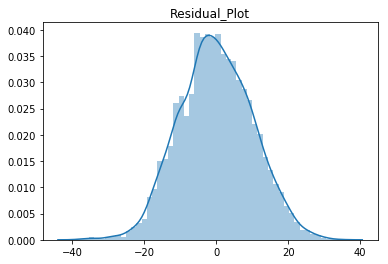

mean : 0.0
std : 10.0


In [147]:
predictions=model4.fittedvalues
residuals=ytrainNew-predictions

sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.round(np.std(residuals)))

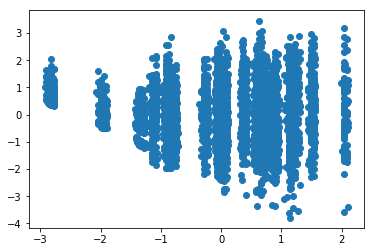

In [148]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))

Text(0.5,1,'Model-1 Residuals Probability Plot')

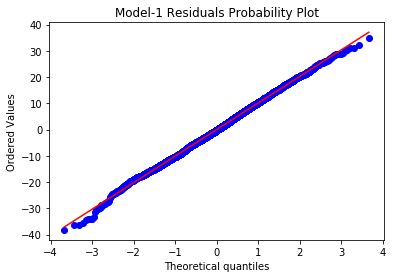

In [149]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [150]:
#ON TEST DATA
ytestNew=np.sqrt(ytest)
y_pred=model4.predict(XtestNew)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS
R2= 1 - (RSS/TSS);print("R2 :",R2) #1- (RSS/TSS)

R2 : 0.6600495099948192


In [151]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytestNew,model4.predict(XtestNew)))))

RMSE TRAIN: 10.11
RMSE TEST: 10.54


# Boxcox transformation (after removal of  influencial observations)

In [152]:
#OLS
#Linear Regression using Statsmodels API
import statsmodels.api as sm
XtrainNew =sm.add_constant(Xtrain)
XtestNew = sm.add_constant(Xtest)
import scipy.stats as ss
yt,_=ss.boxcox(ytrain)
ytrainNew=yt#**0.5#np.log(ytrain)#np.sqrt(ytrain)#ytrain**0.5#yt
lm = sm.OLS(ytrainNew, XtrainNew)
model5 = lm.fit()
predictions=model5.fittedvalues
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     711.2
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:05   Log-Likelihood:                -19952.
No. Observations:                5667   AIC:                         3.994e+04
Df Residuals:                    5648   BIC:                         4.007e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.10

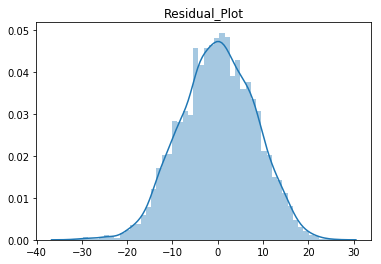

mean : 0.0
std : 8.0


In [153]:
#residuals=model5.resid #residuals
predictions=model5.fittedvalues
residuals=ytrainNew-predictions
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.round(np.std(residuals)))

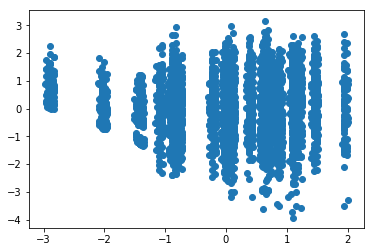

In [154]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))

Text(0.5,1,'Model-1 Residuals Probability Plot')

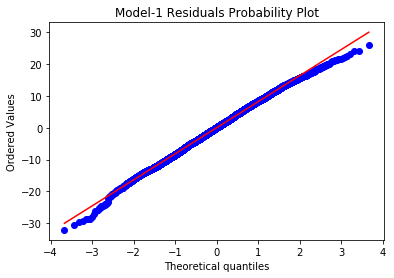

In [155]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [156]:
#ON TEST DATA
ytst,_=ss.boxcox(ytest)
ytestNew=ytst
y_pred=model5.predict(XtestNew)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS
R2= 1 - (RSS/TSS);print("R2 :",R2) #1- (RSS/TSS)

R2 : 0.6797689306184235


In [157]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytestNew,model5.predict(XtestNew)))))

RMSE TRAIN: 8.18
RMSE TEST: 8.44


# Log transformation

In [158]:
#OLS
#Linear Regression using Statsmodels API
import statsmodels.api as sm
XtrainNew =sm.add_constant(Xtrain)
XtestNew = sm.add_constant(Xtest)
import scipy.stats as ss
ytrainNew=np.log(ytrain)#1/np.sqrt(ytrain)#np.sqrt(ytrain)#ytrain**0.5#yt
ytestNew=np.log(ytest)#1/(ytest**0.5)
lm = sm.OLS(ytrainNew, XtrainNew)
model6 = lm.fit()
predictions=model6.fittedvalues
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     911.1
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:06   Log-Likelihood:                -4109.4
No. Observations:                5667   AIC:                             8257.
Df Residuals:                    5648   BIC:                             8383.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.44

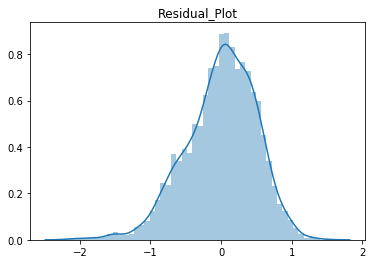

mean : 0.0
std : 0.4996786131179631


In [159]:
#residuals=model6.resid #residuals
predictions=model6.fittedvalues
residuals=ytrainNew-predictions
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.std(residuals))

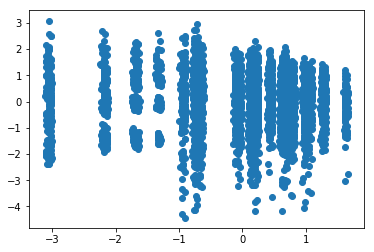

In [160]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))

Text(0.5,1,'Model-1 Residuals Probability Plot')

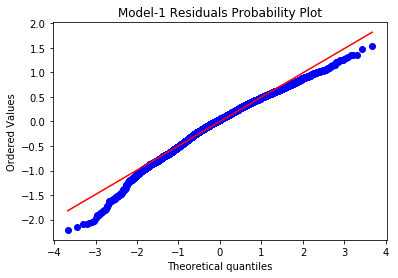

In [161]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [162]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytestNew,model6.predict(XtestNew)))))

RMSE TRAIN: 0.50
RMSE TEST: 0.51


In [163]:
#ON TEST DATA
y_pred=model6.predict(XtestNew)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS
R2= 1 - (RSS/TSS);print("R2 :",R2) #1- (RSS/TSS)

R2 : 0.725762553738412


##### Drop insignificant variables

In [164]:
#Drop insignificant variables 
XtrainNew_sig=XtrainNew.drop(["Fruits and Vegetables","Health and Hygiene","Others","Snack Foods","Soft Drinks","High_Viz"],1)
XtestNew_sig=XtestNew.drop(["Fruits and Vegetables","Health and Hygiene","Others","Snack Foods","Soft Drinks","High_Viz"],1)

In [165]:
#OLS
#Linear Regression using Statsmodels API
import statsmodels.api as sm
import scipy.stats as ss
ytrainNew=np.log(ytrain)#1/np.sqrt(ytrain)#np.sqrt(ytrain)#ytrain**0.5#yt
ytestNew=np.log(ytest)#1/(ytest**0.5)
lm = sm.OLS(ytrainNew,XtrainNew_sig)
model7 = lm.fit()
predictions=model7.fittedvalues
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1367.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:07   Log-Likelihood:                -4111.2
No. Observations:                5667   AIC:                             8248.
Df Residuals:                    5654   BIC:                             8335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4364      0.29

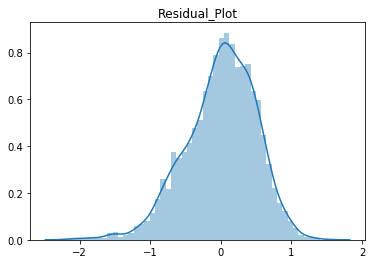

mean : 0.0
std : 0.4998342879735218


In [166]:
residuals=ytrainNew-predictions
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.std(residuals))

Text(0.5,1,'Plot of Standardized Residual vs predicted responce')

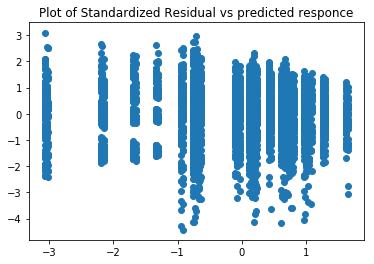

In [167]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))
plt.title("Plot of Standardized Residual vs predicted responce")

Text(0.5,1,'Model-1 Residuals Probability Plot')

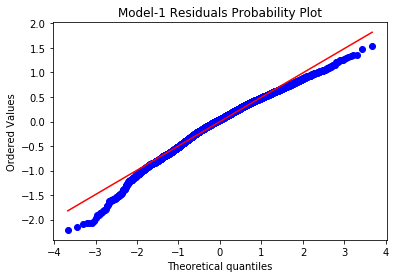

In [168]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [169]:
print('RMSE TRAIN: {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew,predictions))))
print('RMSE TEST: {:.2f}'.format(np.sqrt(mean_squared_error(ytestNew,model7.predict(XtestNew_sig)))))

RMSE TRAIN: 0.50
RMSE TEST: 0.51


In [170]:
#ON TEST DATA
y_pred=model7.predict(XtestNew_sig)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS(Residual Sum of Squares)
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS (Total Sum of Squares)   (TSS-RSS=SSR)
R2= 1 - (RSS/TSS);print("R2 :",R2) #1-(RSS/TSS)= (TSS-RSS)/TSS = SSR/TSS = Percentage of explained variation in total varn.

R2 : 0.725648729357028


In [171]:
#######################################################################################################################

# Lasso and Ridge regression 

In [172]:
#we use transformed responce variable which is approximately normally distributed.And we use Xtrain as it is.
ytrainNew=np.log(ytrain)
ytestNew=np.log(ytest)
Xtrain=Xtrain

In [173]:
#LASSO
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.01).fit(Xtrain,ytrainNew)
y_predict = ls.predict(Xtrain)
print('Lasso model, intercept: ', ls.intercept_)
print('Lasso model, coefficients: ', ls.coef_)
print('Root Mean squared error(Train): {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew , y_predict))))
print('r2_score train(Lasso model): {:.2f}'.format(r2_score(ytrainNew, y_predict)))
print(100*"-")

Lasso model, intercept:  5.788532925848462
Lasso model, coefficients:  [-0.01952917  0.          0.         -0.          0.          0.
 -0.          0.         -0.28155456  0.          0.          1.48838171
  0.84756568  2.02498257 -0.          0.58978525  1.00640121  1.28030218]
Root Mean squared error(Train): 0.52
r2_score train(Lasso model): 0.72
----------------------------------------------------------------------------------------------------


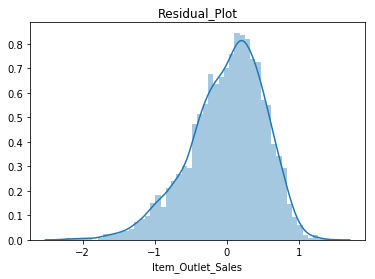

mean : 0.0
std : 0.520584020403445


In [174]:
predictions=ls.predict(Xtrain)
residuals=ytrainNew-predictions
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.std(residuals))

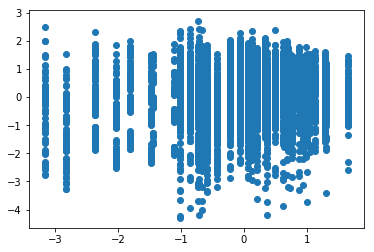

In [175]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))

Text(0.5,1,'Model-1 Residuals Probability Plot')

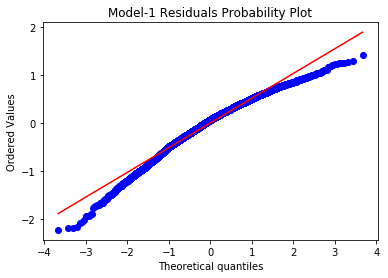

In [176]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [177]:
#ON TEST DATA
y_pred=ls.predict(Xtest)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS(Residual Sum of Squares)
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS (Total Sum of Squares)   (TSS-RSS=SSR)
R2= 1 - (RSS/TSS);print("R2 :",R2)

R2 : 0.7022355504522695


In [178]:
#Ridge
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.01).fit(Xtrain, ytrainNew)
y_predict = rg.predict(Xtrain)

print('Ridge model, intercept: ', rg.intercept_)
print('Ridge model, coefficients: ', rg.coef_)
print('Root Mean squared error(Train): {:.2f}'.format(np.sqrt(mean_squared_error(ytrainNew , y_predict))))
print('r2_score train(Ridge model): {:.2f}'.format(r2_score(ytrainNew, y_predict)))

Ridge model, intercept:  5.4409720902710434
Ridge model, coefficients:  [-0.01446608  0.03313447  0.00816456  0.00481828  0.05209268  0.00581678
 -0.01434024 -0.30958075 -0.32682391 -0.08693378 -0.19430966  1.80089093
  1.62868447  2.68885902 -0.03098796  0.74803856  1.17039408  1.47225294]
Root Mean squared error(Train): 0.50
r2_score train(Ridge model): 0.74


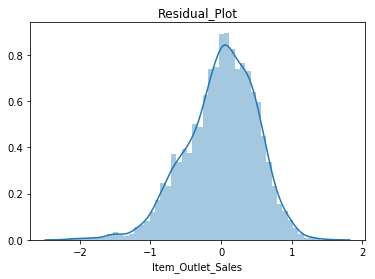

mean : 0.0
std : 0.4996786177878807


In [179]:
predictions=rg.predict(Xtrain)
residuals=ytrainNew-predictions
sns.distplot(residuals,bins=50)
plt.title("Residual_Plot")
plt.show()
print('mean :',np.round(np.mean(residuals)))
print('std :',np.std(residuals))

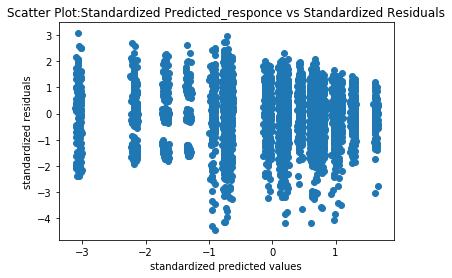

In [222]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()

#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(predictions),get_standard_values(residuals))

plt.title('Scatter Plot:Standardized Predicted_responce vs Standardized Residuals' )
plt.xlabel('standardized predicted values')
plt.ylabel('standardized residuals')
plt.show()

Text(0.5,1,'Model-1 Residuals Probability Plot')

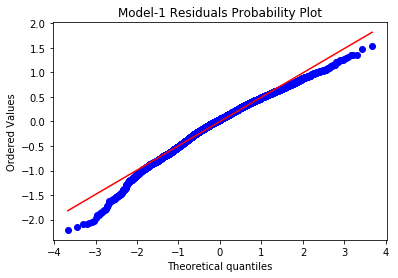

In [181]:
import scipy.stats as ss
ss.probplot(residuals, plot= plt)#Calculate quantiles for a probability plot, and optionally show the plot.
plt.title("Model-1 Residuals Probability Plot")

In [182]:
#ON TEST DATA
y_pred=rg.predict(Xtest)
RSS = np.sum(np.square(ytestNew - y_pred)) #RSS(Residual Sum of Squares)
TSS = np.sum(np.square(ytestNew - np.mean(ytestNew))) #TSS (Total Sum of Squares)   (TSS-RSS=SSR)
R2= 1 - (RSS/TSS);print("R2 :",R2)

R2 : 0.7257620451163451


In [214]:
df=pd.DataFrame({"ytestNew":ytestNew,"y_pred":y_pred,"residual":ytestNew-y_pred})  #;df

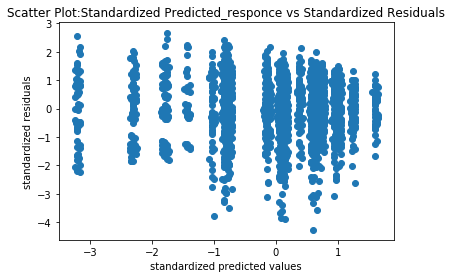

In [223]:
#function for standardization
def get_standard_values(vals):
    return (vals-vals.mean())/vals.std()
#plot standardized residuals vs standardized predicted values
plt.scatter(get_standard_values(y_pred),get_standard_values(ytestNew-y_pred))

plt.title('Scatter Plot:Standardized Predicted_responce vs Standardized Residuals' )
plt.xlabel('standardized predicted values')
plt.ylabel('standardized residuals')
plt.show()

# Final Report Table Of Results
Improvement in RSquared value can be summarized in following table

In [7]:
import pandas as pd
results={'models':["model1","model2","model3","model4","model5","model6","model7","Lasso","Ridge"],"RSquared":[0.531,0.623,0.650,0.672,0.694,0.744,0.744,0.72,0.74]}
pd.DataFrame(results)

,models,RSquared
0,model1,0.531
1,model2,0.623
2,model3,0.650
3,model4,0.672
4,model5,0.694
5,model6,0.744
6,model7,0.744
7,Lasso,0.720
8,Ridge,0.740


# #-----------------------------------The End-----------------------------------------# #